<a href="https://colab.research.google.com/github/CSF0744/ECE171B/blob/main/ECE171BHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#P1 e

In [2]:
x0=np.array([1,0,0]).reshape(3,1)
xhat0=np.array([0,0,0]).reshape(3,1)
epsilon0=x0-xhat0
tspan=[0,15]
A=np.array([[-1,1,-2],
      [0,0,1],
      [0,1,0]])
B=np.array([[1],[1],[1]])
C=np.array([0,0,1])
C=C.reshape(1,3)
K=np.array([1,1,3])
K=K.reshape(1,3)
L=np.array([5,2,-4])
L=L.reshape(3,1)
#print(A-L@C)
Atil=np.block([[A-B@K,B@K],
        [np.zeros((3,3)),A-L@C]])
print(Atil)

[[-2.  0. -5.  1.  1.  3.]
 [-1. -1. -2.  1.  1.  3.]
 [-1.  0. -3.  1.  1.  3.]
 [ 0.  0.  0. -1.  1. -7.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  1.  4.]]


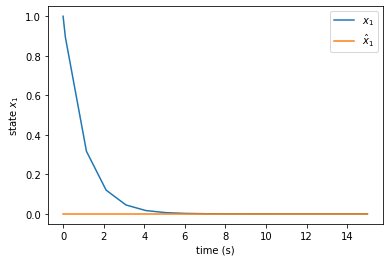

In [3]:
from scipy.integrate import solve_ivp as ode45
def func1(t,X):
  return Atil@X
xtil2=[1,0,0,1,0,0]
#print(xtil)
#print(np.shape(xtil2))
sol=ode45(func1,tspan,xtil2)
#plt.subplot(311)
plt.plot(sol.t,sol.y[0]);
plt.plot(sol.t,sol.y[0]-sol.y[3]);
plt.xlabel('time (s)');
plt.ylabel('state $x_1$');
plt.legend(['$x_1$','$\hat{x}_1$']);

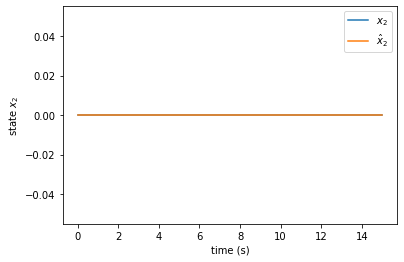

In [4]:
#plt.subplot(312)
plt.plot(sol.t,sol.y[1]);
plt.plot(sol.t,sol.y[1]-sol.y[4]);
plt.xlabel('time (s)');
plt.ylabel('state $x_2$');
plt.legend(['$x_2$','$\hat{x}_2$']);

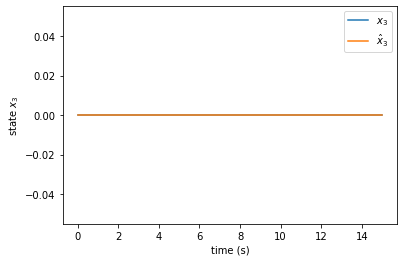

In [5]:
#plt.subplot(313)
plt.plot(sol.t,sol.y[2]);
plt.plot(sol.t,sol.y[2]-sol.y[5]);
plt.xlabel('time (s)');
plt.ylabel('state $x_3$');
plt.legend(['$x_3$','$\hat{x}_3$']);

#P4 b

In [6]:
from numpy.random import seed
from numpy.random import normal
seed(1)

#parameters
a=c=1
rv=rw=0.1
P0=0.1
x0=normal(loc=0,scale=P0)
L0=a*c*P0/(rw+c*c*P0)
xhat0=0
T=1000
t=np.linspace(1,T,num=T)
#array to store values
x=np.array([x0]) #state
P=np.array([P0]) #covariance
L=np.array([L0]) #gain
xhat=np.array([xhat0]) #estimate
y=np.array([c*x0+normal(0,rw)]) #output

#update parameter policy
def update(state,cov,gain,estimate,output):
  X=a*state[-1]+normal(0,rv)
  P=cov[-1]*(a-c*gain[-1])**2+rv+gain[-1]*gain[-1]*rw
  L=a*c*P/(rw+P*c**2)
  Xhat=a*estimate[-1]+gain[-1]*(output[-1]-c*estimate[-1])
  Y=c*state[-1]+normal(0,rw)
  state=np.concatenate((state,np.array([X])),axis=0)
  cov=np.concatenate((cov,np.array([P])),axis=0)
  gain=np.concatenate((gain,np.array([L])),axis=0)
  estimate=np.concatenate((estimate,np.array([Xhat])),axis=0)
  output=np.concatenate((output,np.array([Y])),axis=0)
  return state,cov,gain,estimate,output

#iteration
for k in t:
  x,P,L,xhat,y = update(x,P,L,xhat,y)

Text(0, 0.5, 'value')

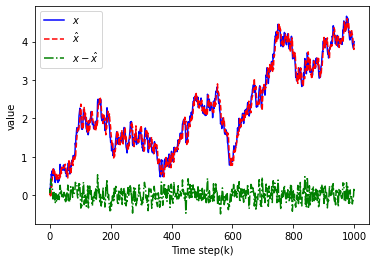

In [19]:
figure, ax=plt.subplots()
ax.plot(np.linspace(0,T,num=T+1),x,color='b')
ax.plot(np.linspace(0,T,num=T+1),xhat,color='r',Linestyle='--')
ax.plot(np.linspace(0,T,num=T+1),x-xhat,color='g',Linestyle='-.')
ax.legend(['$x$','$\hat{x}$','$x-\hat{x}$'])
ax.set_xlabel('Time step(k)')
ax.set_ylabel('value')

Text(0, 0.5, '$P$')

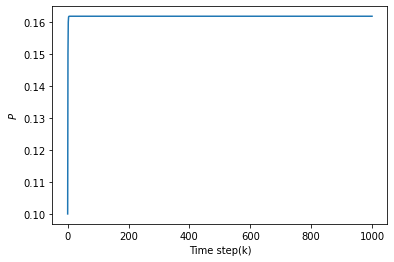

In [14]:
plt.plot(np.linspace(0,T,num=T+1),P)
plt.xlabel('Time step(k)')
plt.ylabel('$P$')

Text(0, 0.5, '$L$')

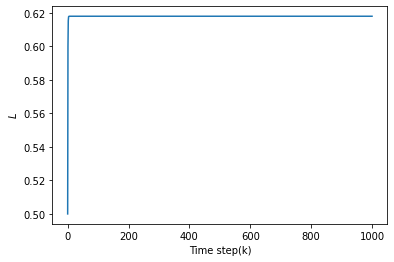

In [15]:
plt.plot(np.linspace(0,T,num=T+1),L)
plt.xlabel('Time step(k)')
plt.ylabel('$L$')

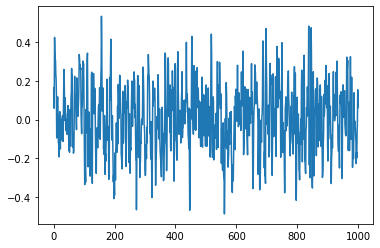

In [10]:
plt.plot(np.linspace(0,T,num=T+1),x-xhat)